# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [26]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv',header=None, names=['Body temperature (degrees Fahrenheit)', 'Gender (1 = male, 2 = female)', 'Heart rate (beats per minute)'])

In [27]:
# Your work here.
df.head()

,Body temperature (degrees Fahrenheit),"Gender (1 = male, 2 = female)",Heart rate (beats per minute)
0,﻿96.3,1,70
1,96.7,1,71
2,96.9,1,74
3,97,1,80
4,97.1,1,73


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
Body temperature (degrees Fahrenheit)    130 non-null object
Gender (1 = male, 2 = female)            130 non-null int64
Heart rate (beats per minute)            130 non-null int64
dtypes: int64(2), object(1)
memory usage: 3.1+ KB


In [29]:
df.describe()

,"Gender (1 = male, 2 = female)",Heart rate (beats per minute)
count,130.000000,130.000000
mean,1.500000,73.761538
std,0.501934,7.062077
min,1.000000,57.000000
25%,1.000000,69.000000
50%,1.500000,74.000000
75%,2.000000,79.000000
max,2.000000,89.000000


In [30]:
df['Body temperature (degrees Fahrenheit)']= df['Body temperature (degrees Fahrenheit)'].convert_objects(convert_numeric=True)

C:\Program Files\Anaconda33\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [31]:
df['Body temperature (degrees Fahrenheit)'] 

0        NaN
1       96.7
2       96.9
3       97.0
4       97.1
5       97.1
6       97.1
7       97.2
8       97.3
9       97.4
10      97.4
11      97.4
12      97.4
13      97.5
14      97.5
15      97.6
16      97.6
17      97.6
18      97.7
19      97.8
20      97.8
21      97.8
22      97.8
23      97.9
24      97.9
25      98.0
26      98.0
27      98.0
28      98.0
29      98.0
       ...  
100     98.5
101     98.6
102     98.6
103     98.6
104     98.6
105     98.7
106     98.7
107     98.7
108     98.7
109     98.7
110     98.7
111     98.8
112     98.8
113     98.8
114     98.8
115     98.8
116     98.8
117     98.8
118     98.9
119     99.0
120     99.0
121     99.1
122     99.1
123     99.2
124     99.2
125     99.3
126     99.4
127     99.9
128    100.0
129    100.8
Name: Body temperature (degrees Fahrenheit), dtype: float64

In [32]:
df.shape

(130, 3)

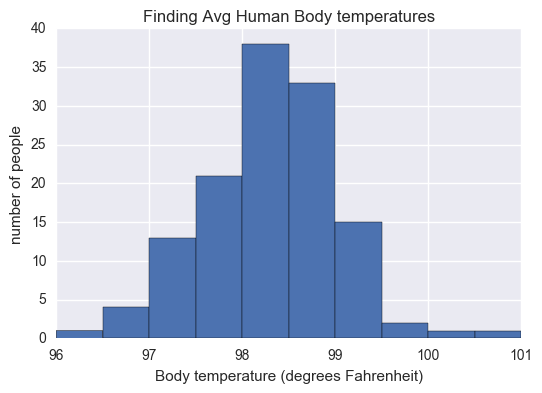

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


# Set default Seaborn style
sns.style = sns.set()

bin_edges = [96, 96.5, 97, 97.5, 98, 98.5, 99, 99.5, 100, 100.5, 101]


_ = plt.hist(df['Body temperature (degrees Fahrenheit)'].dropna(), bins = bin_edges)

_ = plt.xlabel('Body temperature (degrees Fahrenheit)')
_ = plt.ylabel('number of people')
_ = plt.title('Finding Avg Human Body temperatures')
plt.show()

In [34]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x

    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [92]:
male_temps = [x for x in df['Body temperature (degrees Fahrenheit)'].dropna() for y in df['Gender (1 = male, 2 = female)']==1]

In [93]:
female_temps = [x for x in df['Body temperature (degrees Fahrenheit)'].dropna() for y in df['Gender (1 = male, 2 = female)']==2]

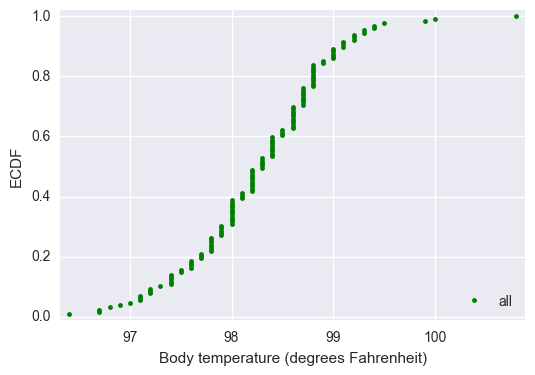

In [37]:
import numpy as np

x_all,y_all = ecdf(df['Body temperature (degrees Fahrenheit)'].dropna())

x_male,y_male = ecdf(male_temps)

x_female,y_female = ecdf(female_temps)


_ = plt.plot(x_all, y_all, marker ='.', linestyle='none', color='green')
# _ = plt.plot(x_male,y_male, marker ='.', linestyle='none', color = 'blue')
# _ = plt.plot(x_female,y_female, marker ='.', linestyle='none', color = 'red')

_ = plt.xlabel('Body temperature (degrees Fahrenheit)')

_ = plt.ylabel('ECDF')

plt.margins(0.02)

plt.legend(('all', 'male', 'female'), loc='lower right')
plt.show()

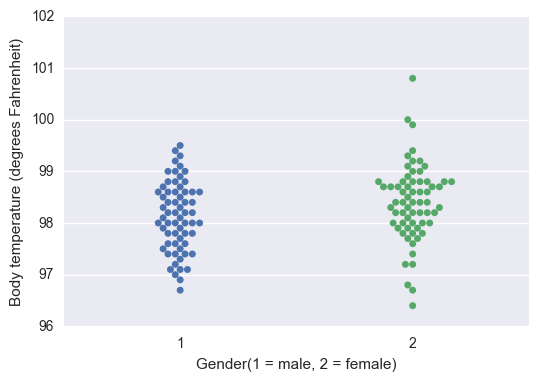

In [38]:
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x='Gender (1 = male, 2 = female)', y='Body temperature (degrees Fahrenheit)', data=df)

# Label the axes
_ = plt.xlabel('Gender(1 = male, 2 = female)')
_ = plt.ylabel('Body temperature (degrees Fahrenheit)')

# Show the plot
plt.show()

###### 
###### Q1. Is the distribution of body temperatures normal? 
###### A1. Diagram below shows that the distribution of the Body temps is normal as the actual data plot follows very cosely to the ecdf (samples based on mu and sigma) plot.   Additionally per the histogram the above distribution is also normal since it is equally distributed around the center.

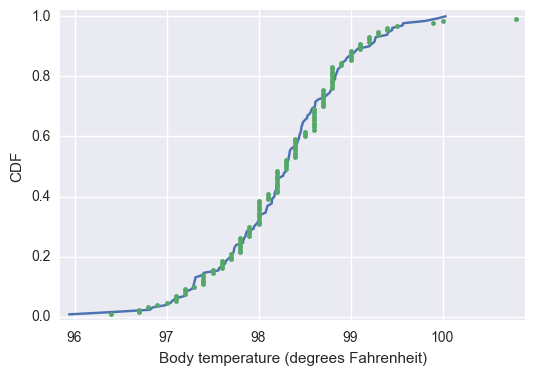

In [39]:
# Compute mean and standard deviation: mu, sigma

mu = np.mean(df['Body temperature (degrees Fahrenheit)'])
sigma = np.std(df['Body temperature (degrees Fahrenheit)'])

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=130)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(df['Body temperature (degrees Fahrenheit)'])

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Body temperature (degrees Fahrenheit)')
_ = plt.ylabel('CDF')
plt.show()

###### 
###### Q2. Is the sample size large? Are the observations independent?
###### A2. So per the CLT (Central Limit Theorem) if the sample size is >30 which here we have taken a 130 count sample size and this should be good to prove that the data is normally distributed.The observations in each sample are assumed to be independent since the sample was drawn randomly.

###### Conditions for CLT:

<h3>Independence</h3>
    <p>
    The sampled obervsations must be independent
    random sampling should be done.
    If sampling without replacement, the sample should be less than 10% of the population.
    </p>
<h3>Sample skew</h3>
    <p>
    The population distribution should be normal
    But if the distribution is skewed, the sample must be large (greater than 30)</p>
    

###### 
###### Q3.Is the true population mean really 98.6 degrees F?
###### A3.  See Below

In [40]:
np.mean(male_temps)

98.264341085271312

In [41]:
np.mean(female_temps)

98.264341085271312

In [42]:
np.mean(df['Body temperature (degrees Fahrenheit)'].dropna())

98.26434108527133

In [43]:
np.mean(df['Body temperature (degrees Fahrenheit)'])

98.26434108527133

###### A one-sample bootstrap hypothesis test

In [44]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [45]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [60]:
# Make an array of translated temperatures: translated_temp
translated_temp = df['Body temperature (degrees Fahrenheit)'].dropna() - np.mean(df['Body temperature (degrees Fahrenheit)']) + 98.6

# Take bootstrap replicates of translated temperatures: bs_replicates
bs_replicates = draw_bs_reps(translated_temp, np.mean, 10000)

# Compute fraction of replicates that are less than the observed population temperatures: p
p = np.sum(bs_replicates <= np.mean(df['Body temperature (degrees Fahrenheit)'].dropna())) / 10000

# Print the p-value
print('p = ', p)

p =  0.0


###### Q3.Is the true population mean really 98.6 degrees F?
###### A3. 
<li> H-null: The mean human body temperature <b>IS</b> 98.6 deg F.
<li> H-alt:  The mean human body temperature <b>IS NOT</b> 98.6 deg F.

$$H_0: p_T = 98.6$$
$$H_A: p_T \ne 98.6$$


<li> According to the one-sample bootstrap test --> With p=0 we can easily reject the null hypothesis that the mean is  98.6 and safely say that the probablitiy that the mean of the population <b>IS NOT</b> 98.6.

###### A one-sample t-test hypothesis testing: Tests the mean of a single group against a known mean

<div><h3>What are T-Values and P-values?</h3>
How big is “big enough”? Every t-value has a p-value to go with it. A p-value is the probability that the results from your sample data occurred by chance. P-values are from 0% to 100%. They are usually written as a decimal. For example, a p value of 5% is 0.05. Low p-values are good; They indicate your data did not occur by chance. For example, a p-value of .01 means there is only a 1% probability that the results from an experiment happened by chance. In most cases, a p-value of 0.05 (5%) is accepted to mean the data is valid.
<ol>
Types of t-tests?
There are three main types of t-test:
<li> An Independent Samples t-test compares the means for two groups.
<li> A Paired sample t-test compares means from the same group at different times (say, one year apart).
<li> A One sample t-test tests the mean of a single group against a known mean.</div>

In [47]:
from scipy import stats

In [48]:
#t = (sample mean - proposed mean)/ (sample std. dev / sqrt(sample size))

tstat =  (np.mean(df['Body temperature (degrees Fahrenheit)'].dropna()) - 98.6)/ (np.std(df['Body temperature (degrees Fahrenheit)'].dropna()) / np.sqrt(130))

tstat


-5.3702083190522494

In [49]:
#Here we are using a 1 sample t-test since we are comparing the mean of this group of people to the known mean 98.6degF
stats.ttest_1samp(df['Body temperature (degrees Fahrenheit)'].dropna(), 98.6)  

Ttest_1sampResult(statistic=-5.3287389083394645, pvalue=4.3163551169933178e-07)

###### Q3.Is the true population mean really 98.6 degrees F?
###### A3. According to the 1 sample t-test--> With a p-value of 10^-7 we can claim that the population mean for the Body Temperatures IS NOT 98.6.  This is because our null hypothesis is that the human body temperature mean is 98.6, but this is being rejected due to the very low p-value gotten from the 1 sample t-test.

$$H_0: p_T = 98.6$$
$$H_A: p_T \ne 98.6$$

###### Q3 let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? 
###### A3 Here we are using a 1 sample t-test since we are comparing the mean of this group of people to the known mean 98.6deg.F.  A 2 sample test would be used if we were comparing male and female body temperatures i.e. 2 distinct samples.


<div>
We use these tests for different reasons and under different circumstances.
<ul>
<li>z-test. A z-test assumes that our observations are independently drawn from a Normal distribution with unknown mean and known variance. A z-test is used primarily when we have quantitative data. (i.e. weights of rodents, ages of individuals, systolic blood pressure, etc.) However, z-tests can also be used when interested in proportions. (i.e. the proportion of people who get at least eight hours of sleep, etc.)

<li>t-test. A t-test assumes that our observations are independently drawn from a Normal distribution with unknown mean and unknown variance. Note that with a t-test, we do not know the population variance. This is far more common than knowing the population variance, so a t-test is generally more appropriate than a z-test, but practically there will be little difference between the two if sample sizes are large.

With z- and t-tests, your alternative hypothesis will be that your population mean (or population proportion) of one group is either not equal, less than, or greater than the population mean (or proportion) or the other group. This will depend on the type of analysis you seek to do, but your null and alternative hypotheses directly compare the means/proportions from the two groups.

<li>Chi-squared test. Whereas z- and t-tests concern quantitative data (or proportions in the case of z), chi-squared tests are appropriate for qualitative data. Again, the assumption is that observations are independent of one another. In this case, you aren't seeking a particular relationship. Your null hypothesis is that no relationship exists between variable one and variable two. Your alternative hypothesis is that a relationship does exist. This doesn't give you specifics as to how this relationship exists (i.e. In which direction does the relationship go) but it will provide evidence that a relationship does (or does not) exist between your independent variable and your groups.

<li>Fisher's exact test. One drawback to the chi-squared test is that it is asymptotic. This means that the p-value is accurate for very large sample sizes. However, if your sample sizes are small, then the p-value may not be quite accurate. As such, Fisher's exact test allows you to exactly calculate the p-value of your data and not rely on approximations that will be poor if your sample sizes are small.

I keep discussing sample sizes - different references will give you different metrics as to when your samples are large enough. I would just find a reputable source, look at their rule, and apply their rule to find the test you want. I would not "shop around," so to speak, until you find a rule that you "like."

Ultimately, the test you choose should be based on a) your sample size and b) what form you want your hypotheses to take. If you are looking for a specific effect from your A/B test (for example, my B group has higher test scores), then I would opt for a z-test or t-test, pending sample size and the knowledge of the population variance. If you want to show that a relationship merely exists (for example, my A group and B group are different based on the independent variable but I don't care which group has higher scores), then the chi-squared or Fisher's exact test is appropriate, depending on sample size.
</div>

<div>Z-test vs T-test
We have already done a few Z-tests before where we validated our null hypothesis.


<li>A T-distribution is similar to a Z-distribution—it is centered at zero and has a basic bell shape, but its shorter and flatter around the center than the Z-distribution.

<li>The T-distributions' standard deviation is usually proportionally larger than the Z, because of which you see the fatter tails on each side.

<li>The t distribution is usually used to analyze the population when the sample is small.

<li>The Z-test is used to compare the population mean against a sample or compare the population mean of two distributions with a sample size greater than 30. An example of a Z-test would be comparing the heights of men from different ethnicity groups.

<li>The T-test is used to compare the population mean against a sample, or compare the population mean of two distributions with a sample size less than 30, and when you don't know the population's standard deviation.</div>

###### Q3 In this situation, is it appropriate to use the t or z statistic? 
###### A3  Since with a t-test, it assumes that our observations are independently drawn from a Normal distribution with unknown mean and unknown variance, we are therefore inclined to say that it is more appropriate to use the z test in this case.  This is due to the large sample size of >30 i.e. 130 here and the fact that we have a known population mean and a known population variance.

In [50]:
mean_alltemps = np.mean(df['Body temperature (degrees Fahrenheit)'])
std_alltemps = np.std(df['Body temperature (degrees Fahrenheit)'])

zscore = ( 98.6 - mean_alltemps ) / std_alltemps
zscore

0.47099842715740964

In [51]:
prob = 1 - stats.norm.cdf(zscore)
prob

0.31882092904676895

###### A3 Since the p-value (0.31882092904676895 ~ 0.3) is greater than the significance level (α assumed to be 0.05 for (0.95)95% confidence interval), then the null hypothesis is consistent and cannot be rejected. In other words per the p-value of the zscore the human body temperature mean is 98.6 deg F.

$$H_0: p_T = 98.6$$
$$H_A: p_T \ne 98.6$$

This shows us that the t-statistic and z-statistic give us opposed results.  
The 1 sample bootstrap test and the 1 sample t-test both give same results i.e. mean human body temperature is not 98.6.
The z-statistic is that the mean human body temperature IS 98.6.

Since for a large sample test we follow z-test we now say that the mean human body temperature IS 98.6.

###### Q4 Draw a small sample of size 10 from the data and repeat both frequentist tests.  
###### Which one is the correct one to use? 
###### What do you notice? 
###### What does this tell you about the difference in application of the t and z statistic? 

In [52]:
replicate_temps = np.random.choice(df['Body temperature (degrees Fahrenheit)'].dropna(), 10)
replicate_temps

array([ 99.2,  97.8,  98.7,  97.3,  97.6,  98.2,  98.8,  98.5,  98.6,  98.6])

In [53]:
#Here we are using a 1 sample t-test since we are comparing the mean of this group of people to the known mean 98.6degF
stats.ttest_1samp(replicate_temps, 98.6)

Ttest_1sampResult(statistic=-1.4361611830599308, pvalue=0.18478961444931291)

In [54]:
mean_tentemps = np.mean(replicate_temps)
std_tentemps = np.std(replicate_temps)

zscoreten = ( 98.6 - mean_tentemps ) / std_tentemps
zscoreten

0.47872039435331032

In [55]:
probten = 1 - stats.norm.cdf(zscoreten)
probten

0.31606877756662977

###### A4 The sample size of 10 i.e. < 30 indicates that the t-test be used.

###### A4. According to the 1 sample t-test--> With a p-value of (0.0042147718874694833 ~ 0.004) we can claim that the population mean for the Body Temperatures IS NOT 98.6.  This is because our null hypothesis is that the human body temperature mean is 98.6, but this is being rejected due to the very low p-value gotten from the 1 sample t-test.

$$H_0: p_T = 98.6$$
$$H_A: p_T \ne 98.6$$

###### A4 Since the p-value (0.10261337214252908 ~ 0.1) is greater than the significance level (α assumed to be 0.05 for (0.95)95% confidence interval), then the null hypothesis is consistent and cannot be rejected. In other words per the p-value of the zscore the human body temperature mean is 98.6 deg F
$$H_0: p_T = 98.6$$
$$H_A: p_T \ne 98.6$$

This shows us that the t-statistic and z-statistic give us opposed results.  
The 1 sample t-test gives results i.e. mean human body temperature is not 98.6.
The z-statistic is that the mean human body temperature IS 98.6.

We notice here that the sample set in this case when small or large gave us the same results of the 2 tests(t-test, z-test). But since we are following different tests for different sample sizes our results are not the same for the 2 sample sizes (130 vs 10).


Since for a small sample test we follow t-test we now say that the mean human body temperature IS NOT 98.6.

###### Q5 At what temperature should we consider someone's temperature to be "abnormal"? 
###### As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach. 
###### Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws. 

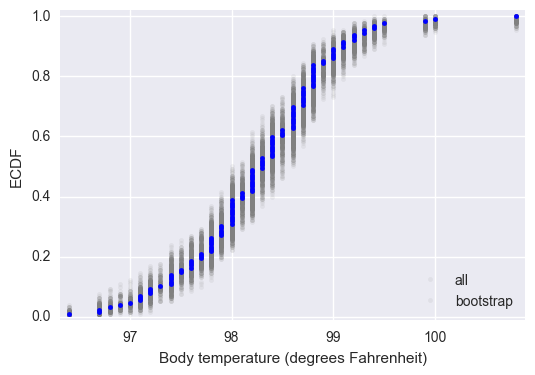

In [113]:
import numpy as np

for _ in range(150):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(df['Body temperature (degrees Fahrenheit)'], size=len(df['Body temperature (degrees Fahrenheit)']))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)


x_all,y_all = ecdf(df['Body temperature (degrees Fahrenheit)'].dropna())

_ = plt.plot(x_all, y_all,'.', color='blue')


plt.margins(0.02)
_ = plt.xlabel('Body temperature (degrees Fahrenheit)')
_ = plt.ylabel('ECDF')

plt.legend(('all', 'bootstrap'), loc='lower right')
plt.show()

Std Error of the Mean =  0.0627456863227
Std Dev of the Bootstrap Replicates using Hacker Statistics =  0.062975902052


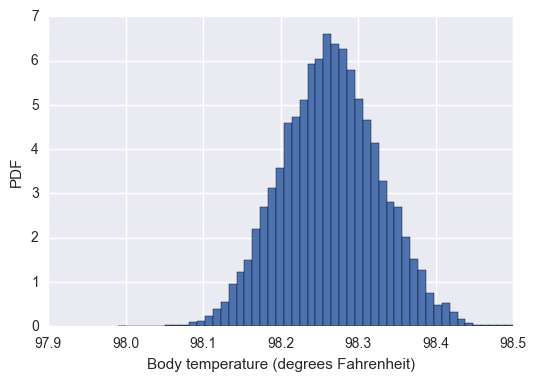

In [121]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(df['Body temperature (degrees Fahrenheit)'].dropna(), np.mean, size=10000)

# Compute and print SEM
sem = np.std(df['Body temperature (degrees Fahrenheit)'].dropna()) / np.sqrt(len(df['Body temperature (degrees Fahrenheit)'].dropna()))
print('Std Error of the Mean = ', sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print('Std Dev of the Bootstrap Replicates using Hacker Statistics = ', bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('Body temperature (degrees Fahrenheit)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


The above distribution is not normal since it has a longer left-tail as seen in the Histogram.

A confidence interval gives bounds on the range of parameter values you might expect to get if we repeated our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can just take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the np.percentile() function.

In [127]:
print('95% Confidence Interval for All Body Temp. =',np.percentile(bs_replicates,[2.5,97.5]),'degrees Fahrenheit')

95% Confidence Interval for All Body Temp. = [ 98.14263566  98.3875969 ] degrees Fahrenheit


The above Confidence Interval tells us that if the temperatures are below 98.14263566 OR above 98.3875969, they should be considered 'abnormal'.
<b>ABNORMAL: Mathematically if t < 98.14263566 degrees Fahrenheit OR t > 98.3875969 degrees Fahrenheit</b>

###### Q6 Is there a significant difference between males and females in normal temperature? 
###### What testing approach did you use and why? 
###### Write a story with your conclusion in the context of the original problem. 

In [84]:
groupby_gender = df.groupby('Gender (1 = male, 2 = female)')

print('Means of Body Temperatures:')
for gender, value in groupby_gender['Body temperature (degrees Fahrenheit)']:
    if (gender ==1):
        male_mean_temp = value.mean()
        print('Male Mean Temp =', male_mean_temp)
        print('Male', value.mean())
    else:
        female_mean_temp = value.mean()
        print('Female Mean Temp =', female_mean_temp)
        print('Female', value.mean())

Means of Body Temperatures:
Male Mean Temp = 98.13281250000003
Male 98.13281250000003
Female Mean Temp = 98.39384615384616
Female 98.39384615384616


C:\Program Files\Anaconda33\lib\site-packages\pandas\tools\plotting.py:3082: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


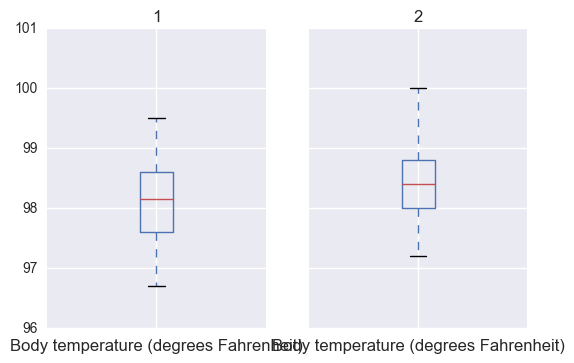

In [57]:
import matplotlib.pyplot as plt
groupby_gender.boxplot(column=['Body temperature (degrees Fahrenheit)'])

plt.show()

###### A two-sample bootstrap hypothesis test for difference of means

In [86]:
# def diff_of_means(data_1, data_2):
#     """Difference in means of two arrays."""

#     # The difference of means of data_1, data_2: diff
#     diff = np.mean(data_1) - np.mean(data_2)

#     return diff

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = female_mean_temp - male_mean_temp
empirical_diff_means

0.26103365384612687

In [103]:
# Compute mean of all temps: mean_temp
mean_temp = np.mean(df['Body temperature (degrees Fahrenheit)'])
print(mean_temp)
# Generate shifted arrays
temp_male_shifted = male_temps - np.mean(male_temps) + mean_temp
print(temp_male_shifted)
temp_female_shifted = female_temps - np.mean(female_temps) + mean_temp
print(temp_female_shifted)
# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_male = draw_bs_reps(temp_male_shifted, np.mean, size=10000)
bs_replicates_female = draw_bs_reps(temp_female_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_male - bs_replicates_female
print(bs_replicates)
print(len(bs_replicates))
print(bs_replicates >= empirical_diff_means)
# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

98.26434108527133
[  96.7   96.7   96.7 ...,  100.8  100.8  100.8]
[  96.7   96.7   96.7 ...,  100.8  100.8  100.8]
[ 0.00466905 -0.00405486 -0.00532499 ...,  0.00602862  0.00118664
 -0.00017889]
10000
[False False False ..., False False False]
p-value = 0.0


###### A6 There a significant difference between males and females in normal temperature.

$$H_0: T_M = T_W$$
$$H_A: T_M \ne T_W$$
p value is 0 (low i.e. < 0.05) indicating that the null hypothesis that states that the 2 sets are equal is refuted and there is a difference in the normal termperatures of men vs women.  The testing approach I used is the 2 sample bootstrap approach to check the difference in means since that gave me enough samples i.e. 10000 to test by bootstrapping both sample sets of male and female body temperatures.